In [ ]:
!unzip -q '/content/dataset.zip' -d '/content/dataset'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas import *
import csv
import matplotlib.pyplot as plt
import os
import random

input_directory = '/content/dataset/dataset'

csv_dirs = os.listdir(input_directory)
X1=[]
X=[]
y=[]
traffic=0
for item in csv_dirs:
    item_path = os.path.join (input_directory, item)
    name = '.'.join(os.path.splitext(item)[:-1])
    data = read_csv(item_path, dtype=np.float64)
    brake = data['brake']
    throttle = data['throttle']
    speed = data['speed']
    #time = data['time']
    #init = time[0]
    #time = time -init
    X1 = np.column_stack((brake, throttle, speed))
    if "no" in name:
      traffic=0
    else:
      traffic=1
    #int_times = time.astype(int)
    #limit_value = int_times[time.size-1]-30
    #limit = np.where(int_times==limit_value)[0][-1]
    starting_point=0
    i=0
    while starting_point<=len(brake)-200:
      #ending_point = np.where(int_times==int_times[starting_point]+30)[0][-1]
      ending_point = starting_point+200
      X.append(X1[starting_point:ending_point])
      y.append(traffic)
      starting_point +=20
      #starting_point= np.where(int_times==int_times[starting_point]+15)[0][-1]

X=np.array(X)

print(X.shape)
y=np.array(y)
print(y.size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

In [ ]:
!pip install sparse_filtering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sparse-filtering: filename=sparse_filtering-1.1-py3-none-any.whl size=3349 sha256=3ef9a40bb6f8c351070a03c38ad48b818fbd312dea60023469def94bb9ef132e
  Stored in directory: /root/.cache/pip/wheels/a0/1b/43/365e0721ed784d9a5a346a284eed329dff3462f9e3f2b47f10
Successfully built sparse-filtering


In [ ]:
#FOR DATA EXPL ANALYSIS

brakes = []
throttles = []
speeds = []

brakes1 = []
throttles1 = []
speeds1 = []
for item in csv_dirs:
    item_path = os.path.join (input_directory, item)
    name = '.'.join(os.path.splitext(item)[:-1])
    if "no" in name:
      data = read_csv(item_path, dtype=np.float64)
      brakes.extend(data['brake'].to_list())
      throttles.extend(data['throttle'].to_list())
      speeds.extend(data['speed'].to_list())
    else:
      data = read_csv(item_path, dtype=np.float64)
      brakes1.extend(data['brake'].to_list())
      throttles1.extend(data['throttle'].to_list())
      speeds1.extend(data['speed'].to_list())


df = pd.DataFrame({"brake": brakes, "throttle": throttles, "speed": speeds})

df.describe()
df.corr()

,brake,throttle,speed
brake,1.000000,-0.623545,-0.523275
throttle,-0.623545,1.000000,0.535433
speed,-0.523275,0.535433,1.000000


In [ ]:
#FOR PCA

from sklearn.decomposition import PCA
X=[]
y=[]
for item in csv_dirs:
    item_path = os.path.join (input_directory, item)
    name = '.'.join(os.path.splitext(item)[:-1])
    data = read_csv(item_path, dtype=np.float64)
    brake = data['brake']
    throttle = data['throttle']
    speed = data['speed']
    #time = data['time']
    #init = time[0]
    #time = time -init
    X1 = np.column_stack((brake, throttle, speed))
    if "no" in name:
      traffic=0
    else:
      traffic=1
    #int_times = time.astype(int)
    #limit_value = int_times[time.size-1]-30
    #limit = np.where(int_times==limit_value)[0][-1]
    starting_point=0
    i=0
    while starting_point<=len(brake)-1000:
      #ending_point = np.where(int_times==int_times[starting_point]+30)[0][-1]
      ending_point = starting_point+1000
      X.extend(X1[starting_point:ending_point])
      y.append(traffic)
      starting_point +=700
      #starting_point= np.where(int_times==int_times[starting_point]+15)[0][-1]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
X1=[]
starting_point=0
while starting_point<=principalComponents.shape[0]-1000:
  #ending_point = np.where(int_times==int_times[starting_point]+30)[0][-1]
  ending_point = starting_point+1000
  X1.append(principalComponents[starting_point:ending_point])
  starting_point +=1000

X1=np.array(X1)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2, method='modified', n_neighbors=100)
print(len(X))
print(len(X[0]))

emb=embedding.fit_transform(X[0:10000])
print(emb.shape)
X1=[]
starting_point=0
while starting_point<=emb.shape[0]-1000:
  #ending_point = np.where(int_times==int_times[starting_point]+30)[0][-1]
  ending_point = starting_point+1000
  X1.append(emb[starting_point:ending_point])
  starting_point +=1000

X1=np.array(X1)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X1, y[0:10], test_size = 0.25, random_state = 0)

630000
3
(10000, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, model_from_json, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd

batch_size = 15
number_of_epochs = 10
verbosity_mode = 1
validation_split = 0.2
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
#model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])


model_lstm.summary()

filepath = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', patience=5)
callbacks = [checkpoint, es]

history = model_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split, callbacks=callbacks)
# IF YOU NEED TO SAVE WEIGHTSSS
# model_json = model_lstm.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# model_lstm.save_weights("model.h5")
# print("Saved model to disk")

# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
# loaded_model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
#test_results = loaded_model.evaluate(X_test, y_test, verbose=False)


# Test the model after training
model_lstm = load_model(filepath)
test_results = model_lstm.evaluate(X_test, y_test, verbose=False)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 50)                10800     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
943/943 [==============================] - ETA: 0s - loss: 0.1028 - accuracy: 0.8698
Epoch 1: val_loss improved from inf to 0.09099, saving model to my_best_model.hdf5
943/943 [==============================] - 83s 83ms/step - loss: 0.1028 - accuracy: 0.8698 - val_loss: 0.0910 - val_accuracy: 0.8820
Epoch 2/10
943/943 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.8939
Epoch 2: val_loss improved from 0.090

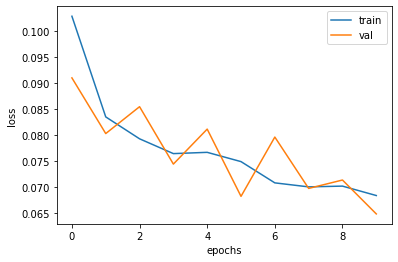

In [ ]:
plt.figure()
#plt.ylim([0,0.45])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
!rm -rf 'dataset'